In [1]:
library(tidyverse)
library(glue)
library(here)
suppressPackageStartupMessages({library(rtracklayer); library(GenomicRanges)})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse

here() starts at /mnt/expressions/mp/archaic-ychr
Loading ychr


## Characteristics of three different capture sets after 50% mappability filtering

### Exome capture set - not filtered

In [2]:
exome50 <- import.bed(here("data/coord/capture_exome.bed"))

In [3]:
length(exome50)

[1] 2519

In [4]:
width(exome50) %>% sum

[1] 118643

In [5]:
import.bed("../tmp/ajhg2064mmc2_V1.txt") %>% width %>% sum

[1] 118643

In [6]:
width(exome50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     3.0    47.1    67.5  1257.0 

### Lippold capture set

In [7]:
lippold50 <- import.bed(here("data/coord/capture_lippold.bed"))

In [8]:
length(lippold50)

[1] 1779

In [9]:
width(lippold50) %>% sum

[1] 556259

In [10]:
width(lippold50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   107.5   119.0   312.7   418.5  2829.0 

In [11]:
lippold50_orig <- import.bed("../input/basti_design.bed")

In [12]:
length(lippold50_orig)

[1] 1251

In [13]:
width(lippold50_orig) %>% sum

[1] 573657

In [14]:
width(lippold50_orig) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   119.0   151.0   458.6   820.0  3899.0 

In [15]:
556259 / 573657

[1] 0.9696718

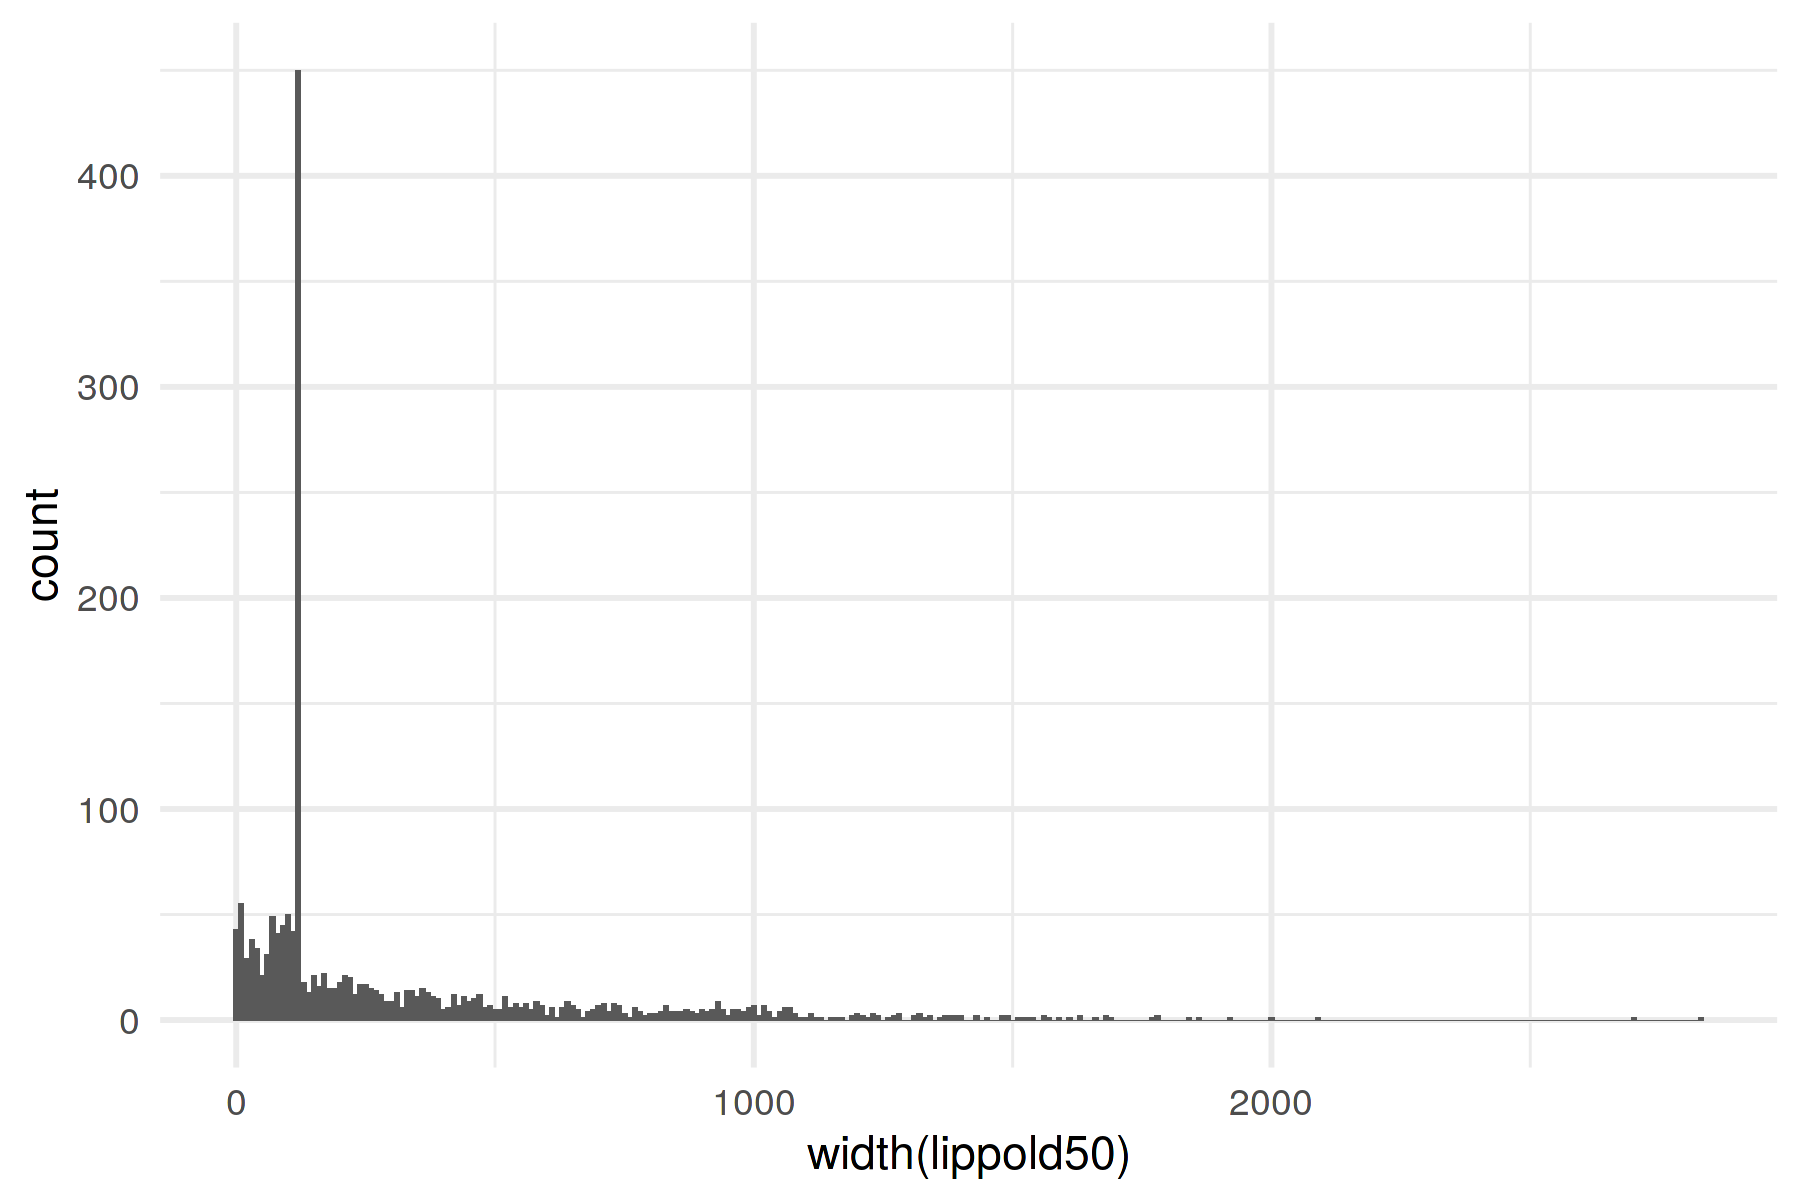

In [16]:
set_dim(6, 4)

ggplot() + geom_histogram(aes(width(lippold50)), binwidth = 10) +
    theme_minimal()

### Full Y chromosome capture set

In [17]:
full50 <- import.bed(here("data/coord/capture_full.bed"))

In [18]:
length(full50)

[1] 15906

In [19]:
width(full50) %>% sum

[1] 6913053

In [20]:
read_delim("../input/Y.filt35_50_SRepeat_100.bed", delim = " ",
           col_names = c("chrom", "start", "end", "width"), col_types = "ciii") %>%
    makeGRangesFromDataFrame(starts.in.df.are.0based = TRUE) %>%
    width %>% sum

[1] 6913053

In [21]:
width(full50) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   145.0   240.0   434.6   489.8  9425.0 

In [22]:
which(width(full50) < 99) %>% length

[1] 0

In [23]:
which(width(full50) == 99) %>% length

[1] 124

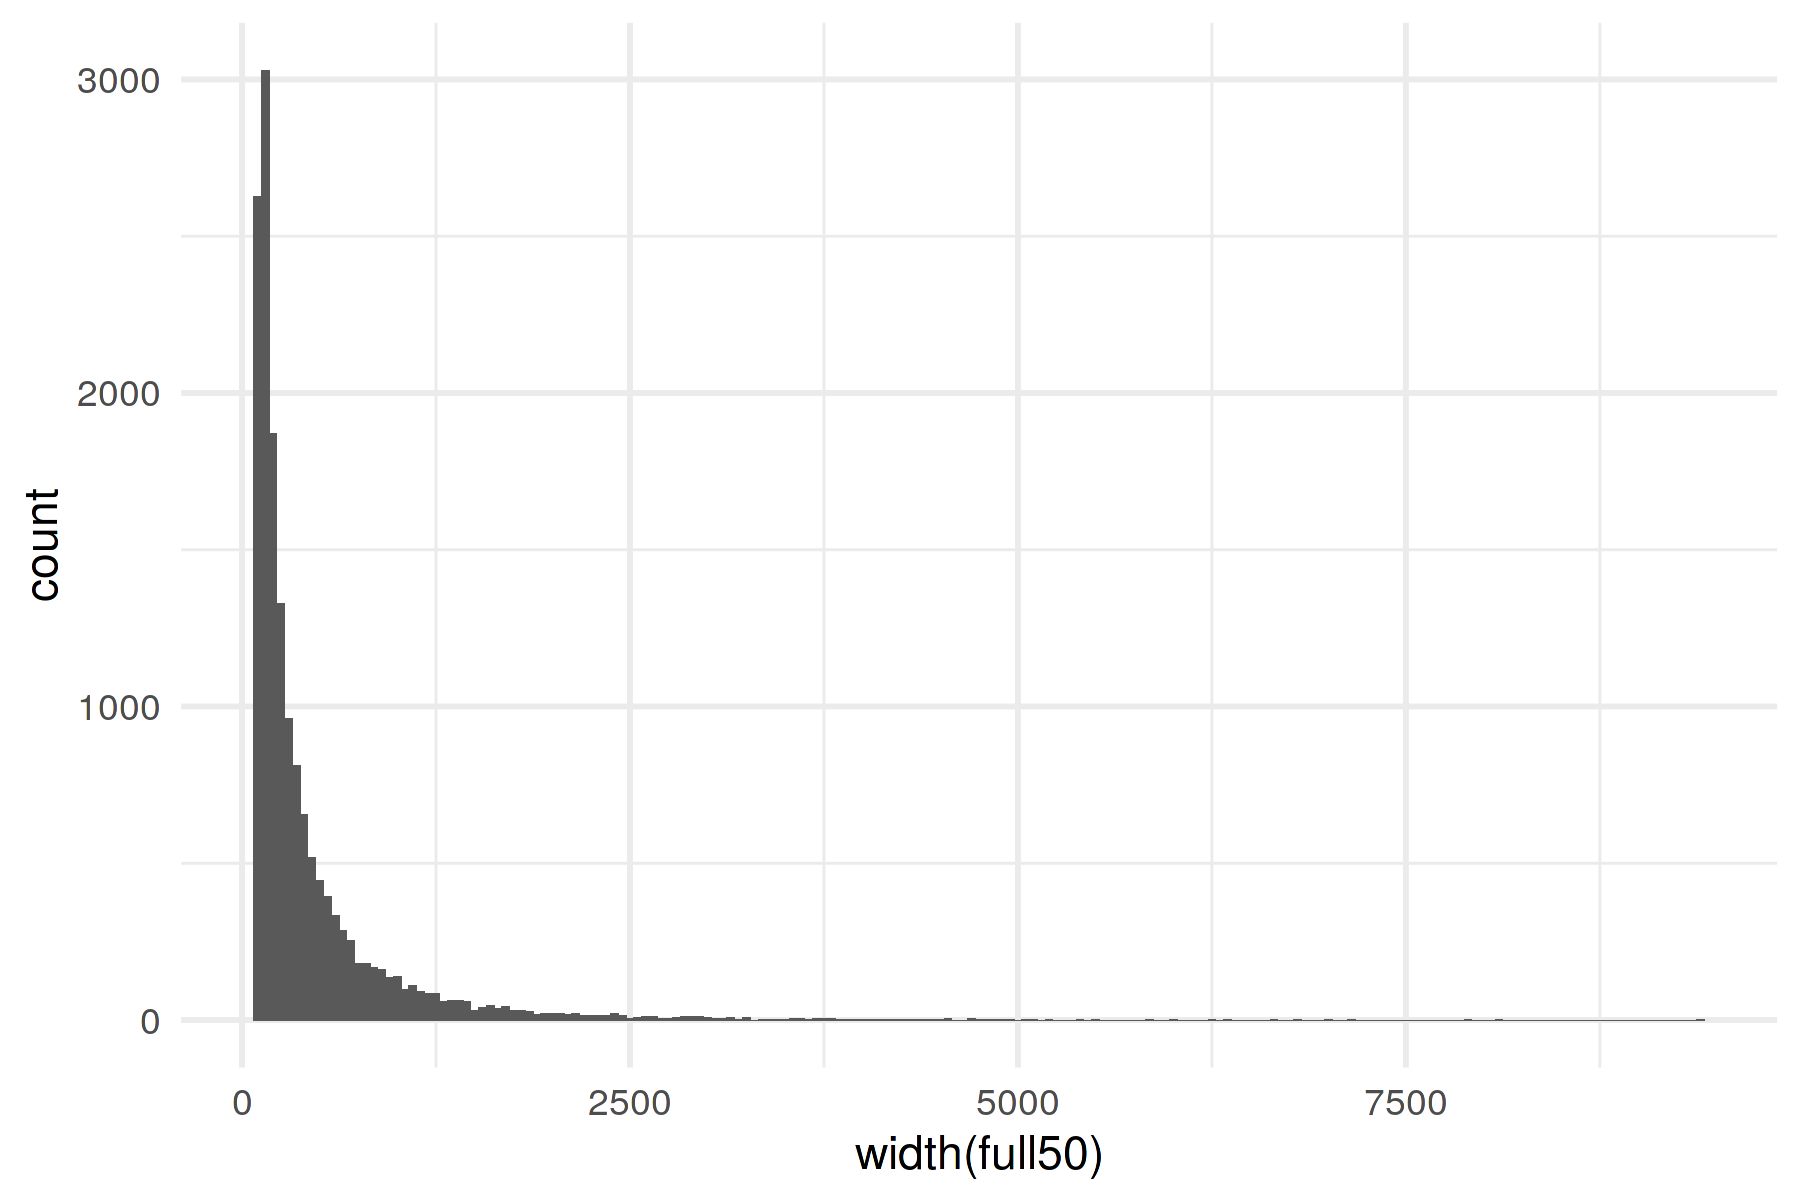

In [24]:
set_dim(6, 4)

ggplot() + geom_histogram(aes(width(full50)), binwidth = 50) +
    theme_minimal()

## Characteristics after 100% mappability filtering

### Lippold capture set

In [51]:
bed <- import.bed(here("data/coord/capture_lippold.bed"))

In [52]:
length(bed)

[1] 3657

In [53]:
width(bed) %>% sum

[1] 433416

In [54]:
import.bed("../input/basti_design.bed") %>% width %>% sum

[1] 573657

In [56]:
433416 / 573657

[1] 0.7555316

### Full Y chromosome capture set

In [41]:
bed <- import.bed(here("data/coord/capture_full.bed"))

In [42]:
length(bed)

[1] 48998

In [43]:
width(bed) %>% sum

[1] 4602444

In [44]:
read_delim("../input/Y.filt35_50_SRepeat_100.bed", delim = " ",
           col_names = c("chrom", "start", "end", "width"), col_types = "ciii") %>%
    makeGRangesFromDataFrame(starts.in.df.are.0based = TRUE) %>%
    width %>% sum

[1] 6913053

In [45]:
4602444 / 6913053

[1] 0.6657614

In [14]:
width(bed) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   99.0   145.0   240.0   434.6   489.8  9425.0 